In [86]:
# first import the dataset
from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE

In [87]:
# we then load the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [88]:
# for keras to read our data, we need to reshape the images
# we will also have to normalize the data to a 0 1 scale
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_images_flat = train_images.reshape((60000, -1)).astype('float32') / 255
print(train_images_flat.shape)


(60000, 784)


In [89]:
# Combine a subset of train_images and labels for visualization
subset_size = 2000  # Adjust for computational feasibility
train_images_subset = train_images_flat[:subset_size]
train_labels_subset = train_labels[:subset_size]

# Apply t-SNE to the subset
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
train_tsne = tsne.fit_transform(train_images_subset)


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


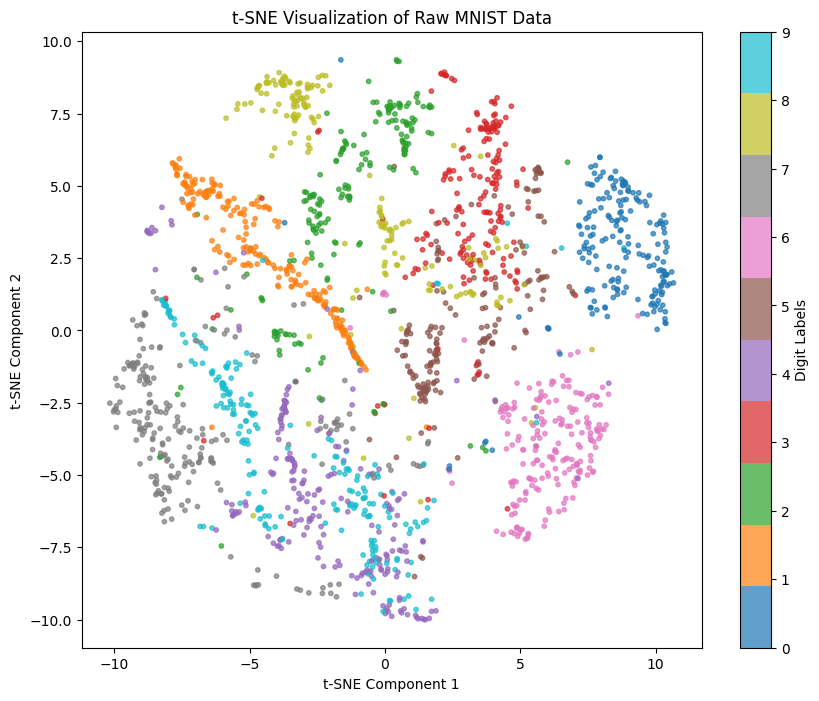

In [90]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=train_labels_subset, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Digit Labels')
plt.title('t-SNE Visualization of Raw MNIST Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [91]:
# we also have to categorically encode the labels
# this hot encodes the data
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [92]:
# the convolution model
# we will import the layers and models to be used 
# the Sequential model is appropriate for this model as
# we will have one input tensor and one output tensor
from keras import layers
from keras import models

# we instantiate the Sequential model
model = models.Sequential()

# the input is a 28x28x1
# the first conv layers will apply 32 filters of 3x3 scale, and
# the output as a 26x26x32
# then followed by a 2x2 Max Pooling which reduces the size of input
# this is because the neighboring pixels tend to have similar values
# we use a 2x2 scale which halves the 26x26 to 13x13
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()



c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
# now we train the dataset
# epochs being the number of times the model will do a forward and backward propagation
# batch size = the number of training example used in forward backward propagation
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9975 - loss: 0.0073
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9978 - loss: 0.0070
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9967 - loss: 0.0099
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9984 - loss: 0.0048
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9979 - loss: 0.0073
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9989 - loss: 0.0036
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9985 - loss: 0.0052
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9987 - loss: 0.0033
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9982 - loss: 0.0056
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9979 - loss: 0.0072


In [97]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.991100013256073 
 Error: 0.8899986743927002


In [98]:
print(test_images.shape)

(10000, 28, 28, 1)


(10000, 784)
(10000, 10)
(2000,)


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


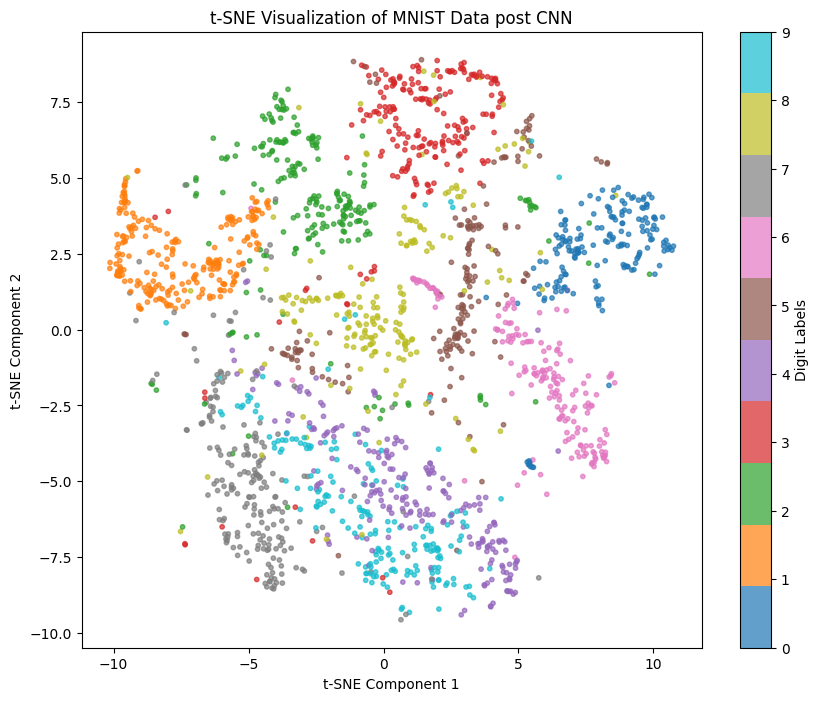

In [99]:
import numpy as np
test_images_flat = test_images.reshape((test_images.shape[0], -1)).astype('float32') / 255
print(test_images_flat.shape)
print(test_labels.shape)

if test_labels.ndim > 1:
    test_labels = np.argmax(test_labels, axis=1)

subset_size = 2000
test_images_subset = test_images_flat[:subset_size]
test_labels_subset = test_labels[:subset_size]
print(test_labels_subset.shape)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
test_tsne = tsne.fit_transform(test_images_subset)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(test_tsne[:, 0], test_tsne[:, 1], c=test_labels_subset, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Digit Labels')
plt.title('t-SNE Visualization of MNIST Data post CNN')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


KeyError: 'val_accuracy'

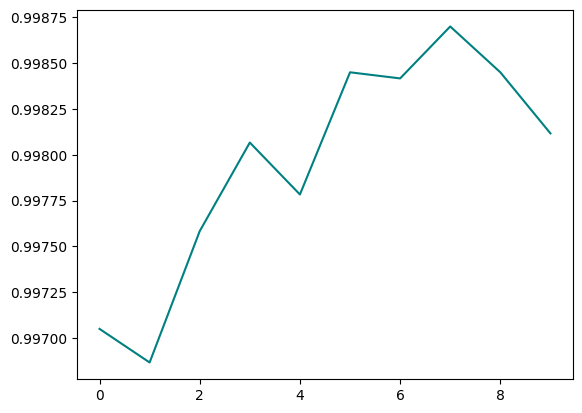

In [102]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()